<a href="https://colab.research.google.com/github/DeepaManjunath/Assignment3/blob/master/Copy_of_assignment3_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,SeparableConv2D,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


10


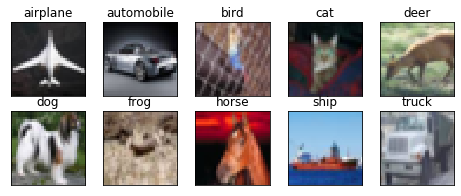

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
print(num_classes)
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
#print(num_classes)
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(81,kernel_size=(3, 3),activation='relu',padding='same',input_shape=(32, 32, 3)))#RF=1
model.add(BatchNormalization(momentum=0.355))
model.add(Dropout(0.15))

model.add(SeparableConv2D(81,kernel_size=(3,3),padding='same',activation='relu'))#32 #RF=3x3
model.add(BatchNormalization(momentum=0.355))
model.add(Dropout(0.15))
model.add(SeparableConv2D(81,kernel_size=(3,3),strides=2,padding='same',activation='relu'))#32 #RF=5x5
model.add(BatchNormalization(momentum=0.355))
model.add(Dropout(0.15))



model.add(SeparableConv2D(81,kernel_size=(3,3),padding='same',activation='relu'))#16 RF=7x7
model.add(BatchNormalization(momentum=0.355))
model.add(Dropout(0.15))

model.add(Convolution2D(10,1,1,activation='relu'))#16 RF=7x7

model.add(SeparableConv2D(10,kernel_size=(3,3),strides=2,padding='same',activation='relu'))#16 RF=11x11
model.add(BatchNormalization(momentum=0.355))
model.add(Dropout(0.15))

model.add(SeparableConv2D(10,kernel_size=(3,3),strides=2,padding='same',activation='relu'))#16 RF=15x15
model.add(BatchNormalization(momentum=0.355))
model.add(Dropout(0.15))



model.add(Convolution2D(10,1,1,activation='relu'))#16 RF=15x15

model.add(GlobalAveragePooling2D())#

model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_7 (Separabl (None, 32, 32, 81)        351       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 81)        324       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 81)        0         
_________________________________________________________________
separable_conv2d_8 (Separabl (None, 32, 32, 81)        7371      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 81)        324       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 81)        0         
_________________________________________________________________
separable_conv2d_9 (Separabl (None, 16, 16, 81)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1953, epochs=50)`


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.009942.
1953/1953 [==============================] - 166s 85ms/step - loss: 1.2381 - acc: 0.5479 - val_loss: 1.1177 - val_acc: 0.6153
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0075375284.
1953/1953 [==============================] - 163s 83ms/step - loss: 0.9093 - acc: 0.6752 - val_loss: 0.7898 - val_acc: 0.7226
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0060695971.
1953/1953 [==============================] - 163s 83ms/step - loss: 0.8054 - acc: 0.7143 - val_loss: 0.7320 - val_acc: 0.7458
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0050802248.
1953/1953 [==============================] - 163s 84ms/step - loss: 0.7444 - acc: 0.7374 - val_loss: 0.6811 - val_acc: 0.7602
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0043681898.
1953/1953 [==============================] - 163s 83ms/step - loss: 0.

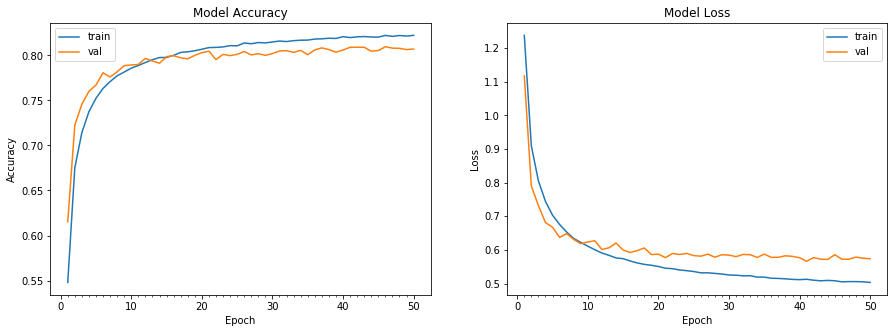

Accuracy on test data is: 80.71


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)




# train the model
start = time.time()
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.009942 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

#model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0]*5, nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks=[LearningRateScheduler(scheduler,verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))